remainder_size: 0, avg: 96154.22, minimum: 94080, maximum: 112036
remainder_size: 8, avg: 97202.21, minimum: 94755, maximum: 115982
remainder_size: 16, avg: 96407.3, minimum: 94849, maximum: 102599
remainder_size: 32, avg: 96568.45, minimum: 94873, maximum: 117800


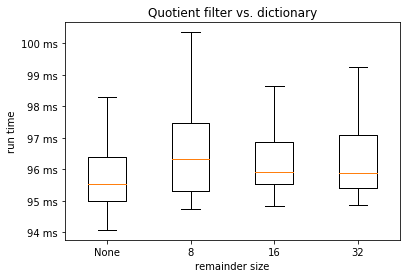

In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

results = json.load(open('benchmark_results.json','r'))
#print(json.dumps(results, indent=2, sort_keys=False))

runtimes = dict()
runtimes[0] = []
runtimes[8] = []
runtimes[16] = []
runtimes[32] = []
remainder_sizes = [o["remainder_size"] for o in results["results"]]
#runtimes = [o["runtime"] for o in results["results"]]

for result in results["results"]:
    runtimes[result["remainder_size"]].append(result["runtime"])
    
for remainder_size, runtime_list in runtimes.items():
    avg = np.mean(runtime_list)
    minimum = np.amin(runtime_list)
    maximum = np.amax(runtime_list)
    print('remainder_size: ' + str(remainder_size)
          + ', avg: ' + str(avg)
          + ', minimum: ' + str(minimum)
          + ', maximum: ' + str(maximum))
    
    
data = [runtimes[0], runtimes[8], runtimes[16], runtimes[32]]

def milliseconds(x, pos):
    'The two args are the value and tick position'
    return '%i ms' % (x*1e-3)
formatter = FuncFormatter(milliseconds)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.boxplot(data, labels=['None', '8', '16', '32'], showfliers=False)
plt.title('Quotient filter vs. dictionary')
plt.xlabel('remainder size')
plt.ylabel('run time')
plt.show()


In [26]:
import json
import pandas as pd

table_info = json.load(open('benchmark_results.csv.json','r'))
#print(json.dumps(table_info, indent=2, sort_keys=False))
column_ids = dict()
for column_id in range(0, len(table_info["columns"]) - 1):
    column_info = table_info["columns"][column_id]
    column_ids[column_info["name"]] = column_id
    
#delimiter = table_info["config"]["delimiter"]
#separator = table_info["config"]["separator"]    
#, sep=separator, delimiter=delimiter
data = pd.read_csv('benchmark_results.csv', header=None)
print(data.groupby([column_ids["row_count"], 
                    column_ids["chunk_size"],
                    column_ids["remainder_size"]]).groups)


{(100000, 10000, 4): Int64Index([0, 1, 2], dtype='int64')}
